### **Reversi**

Reversi se trata de um jogo de tabuleiro para 2 pessoas, o qual usa um tabuleiro de 64 casas e peças de 2 cores, em geral preto e branco. As jogadas são executadas por turno. O objetivo do jogo é ter o maior número de peças da sua cor no tabuleiro

### **Como Jogar:**
O jogo tem início com quatro peças no centro do tabuleiro em forma de quadrado (2 brancas e duas pretas), o inicio do jogo se dá pelo movimento do jogador com as peças pretas. Para esse jogo em questão, não existe a possibilidade de diminuir ou aumentar o tabuleiro. Abaixo exemplo de como o jogo inicia:

![](https://drive.google.com/uc?export=view&id=1nkx6tXcC50B26aoFEh6iiyR4bxgu4f7L)




### **Jogadas**

  Cada movimento realizado pelos jogadores tem por objetivo colocar as peças em alguma posição vazia ao lado da peça do oponente, tendo como resultado virar pelo menos uma peça para a sua cor.
  Após a colocação do disco no tabuleiro, o jogador vira todos os discos que sejam da cor do adversário e que estejam colocadas em linha reta na horizontal ou na vertical e que estejam entre a peça recém colocada e uma outra desse mesmo jogador. Abaixo está um exemplo de jogada: 

![](https://drive.google.com/uc?export=view&id=1aCaOmWB6lrFRLB9cJjNkaUwbTVnGR-ES)

  Após isso, a jogada é passada para o adversário, que deve posicionar uma nova peça e assim sucessivamente até o término do jogo. Abaixo estão alguns exemplos de jogadas:

![](https://drive.google.com/uc?export=view&id=1FPieeR1KvQFaHHvJFPFps2dWm8YX2KVF)
  Nesse exemplo, o jogador com as peças pretas capturou apenas duas peças

![](https://drive.google.com/uc?export=view&id=1iAb4ln0JQ3Y429bQntr309B7hlQz5tit)
  Nesse exemplo, o jogador com as peças pretas capturou duas mais uma vez, sendo uma na vertical e a outra na horizontal



### **Vitória**

O jogo termina quando o tabuleiro não possuir nenhuma casa disponível para posicionar uma peça ou até que o oponente não tenha mais chances de vencer a partida. Abaixo está ambos os exemplos:

![](https://drive.google.com/uc?export=view&id=1DUQ9ITAiBuXGv34wpklPkYtXCZAlL1HG)

- [ ] *Todas as imagens foram retiradas durante uma partida do grupo no site clickjogos: [Acesso ao jogo.](https://www.clickjogos.com.br/jogos/reversi)*

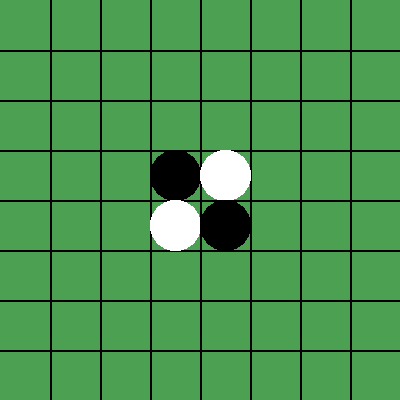


[20, 29, 34, 43]
34
Vez do jogador  1
Jogada na posição 34


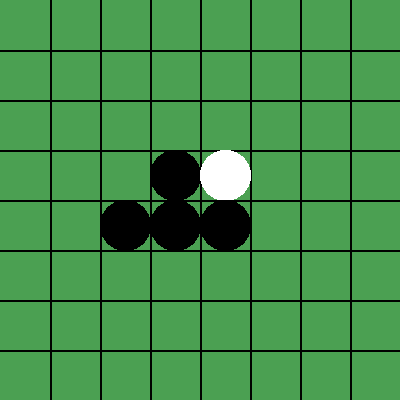


Vez do jogador  -1
Jogada na posição 26


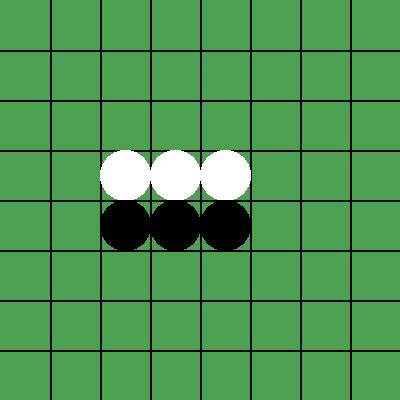


[18, 19, 20]


In [ ]:
from random import randint
from PIL import Image, ImageDraw

##========================================================##

def desenhaTab(tab):
  board = Image.new('RGB', (400, 400),  "#4BA052")
  draw  = ImageDraw.Draw(board)

  x=50
  for i in range(7):
    draw.line( (0, x,  400,  x), fill = "black", width = 2 ) 
    x = x+50;

  x=50
  for i in range(7):
    draw.line( (x, 0,  x,  400), fill = "black", width = 2 ) 
    x = x+50;

  colors = {}
  colors[1] = "black"
  colors[-1] = "white"
  coords = [(0,0,50,50)   ,(50,0,100,50)   ,(100,0,150,50)   ,(150,0,200,50)   ,(200,0,250,50)   ,(250,0,300,50)   ,(300,0,350,50)   ,(350,0,400,50),
           (0,50,50,100) ,(50,50,100,100) ,(100,50,150,100) ,(150,50,200,100) ,(200,50,250,100) ,(250,50,300,100) ,(300,50,350,100) ,(350,50,400,100),
           (0,100,50,150),(50,100,100,150),(100,100,150,150),(150,100,200,150),(200,100,250,150),(250,100,300,150),(300,100,350,150),(350,100,400,150),
           (0,150,50,200),(50,150,100,200),(100,150,150,200),(150,150,200,200),(200,150,250,200),(250,150,300,200),(300,150,350,200),(350,150,400,200),
           (0,200,50,250),(50,200,100,250),(100,200,150,250),(150,200,200,250),(200,200,250,250),(250,200,300,250),(300,200,350,250),(350,200,400,250),
           (0,250,50,300),(50,250,100,300),(100,250,150,300),(150,250,200,300),(200,250,250,300),(250,250,300,300),(300,250,350,300),(350,250,400,300),
           (0,300,50,350),(50,300,100,350),(100,300,150,350),(150,300,200,350),(200,300,250,350),(250,300,300,350),(300,300,350,350),(350,300,400,350),
           (0,350,50,400),(50,350,100,400),(100,350,150,400),(150,350,200,400),(200,350,250,400),(250,350,300,400),(300,350,350,400),(350,350,400,400)]

  for i in range(len(tab)):
    if(tab[i]==0):
      pass
    else:
      draw.ellipse(coords[i], width=6, outline = colors[tab[i]], fill = colors[tab[i]])

  display(board)

def get_valid_moves(turn, tab):
  validMoves = []

  for i in range(64):
    if(valida(i,turn,tab)==1):
      validMoves.append(i)
  return validMoves
## Junta num vetor os movimentos válidos

def valida(pos, turn, tab):
  if(checkDentro(pos, tab)==1):
    if(checkPos(pos, tab)==1):
      if(checkSides(pos, turn, tab)!=[0,0,0,0]):
        if(checkLine(pos, turn, tab)!=[0,0,0,0]):
          return 1
  return 0
## Usa as próximas 4 funções para verificar validez da pos

def checkLine(pos, turn, tab):
  sides = checkSides(pos,turn,tab)
  valSides = [0,0,0,0]

  for i in range(4):
    y=8
    x=1

    ##Confere seguindo pra cima
    if(sides[0]!=0 and i==0):
      while pos-y > 0:
        if(tab[pos-y] == turn):
          valSides[0]=1
        y = y + 8

    ##Confere seguindo pra direita
    if(sides[1]!=0 and i==1):
      while (pos+x)%8!=0:
        if(tab[pos+x] == turn):
          valSides[1]=1
        x = x + 1

    ##Confere seguindo pra baixo
    if(sides[2]!=0 and i==2):
      while pos+y < 63:
        if(tab[pos+y] == turn):
          valSides[2]=1
        y = y + 8

    ##Confere seguindo pra esquerda
    if(sides[3]!=0 and i==3):
      while (pos-x+1)%8!=0:
        if(tab[pos-x] == turn):
          valSides[3]=1
        x = x + 1

  return valSides
## Retorna num vetor qual linha termina em turn

def checkPos(pos, tab):
  if(tab[pos] == 0):
    return 1

  else:
    return 0
## Verifica se a posição está vazia

def checkDentro(pos, tab):
  if(0<=pos<=63):
    return 1
  
  else:
    return 0
## Verifica se a posição está dentro do tabuleiro

def checkSides(pos, turn, tab):
  sides = [0, 0, 0, 0]

  if((pos-8 > 0) and (tab[pos-8]==-turn)):
    sides[0] = -turn
  if((pos+1 < 63) and (tab[pos+1]==-turn)):
    sides[1] = -turn
  if((pos+8 < 63) and (tab[pos+8]==-turn)):
    sides[2] = -turn
  if((pos-1 > 0) and (tab[pos-1]==-turn)):
    sides[3] = -turn

  return sides
## Retorna num vetor qual lado possui vizinho -turn

def winner(tab):
  r = 0
  for j in range(len(tab)):
    r = r+tab[j]
  return(r)
## Verifica valor do tab final

def botMove(turn, tab):
  botMoves=get_valid_moves(turn, tab)

  if(not botMoves):
    pass

  else:
    return(botMoves[randint(0,len(botMoves)-1)])
## Bot de jogadas ao acaso

def game (turn, tab):
  if(turn == 1): #player
    print(get_valid_moves(turn, tab))
    pos = int(input())
    while (valida(pos, turn, tab)!=1):
      print("Movimento inválido!")
      print(get_valid_moves(turn, tab))
      pos = int(input())
    tab = putPiece(pos,tab,turn)
    return(tab)

  else: #bot
    tab = putPiece(botMove(turn, tab),tab,turn)
    return(tab)
## Alterna entre os jogadores

def putPiece(pos,tab,turn):
  print('Vez do jogador ', + turn)
  print('Jogada na posição', + pos)
  tempTab = list(tab)
  tempTab[pos] = turn
  tempTab = changeLine(pos, turn, tempTab)
  desenhaTab(tempTab)
  tab = tuple(tempTab)

  return(tab)
## Coloca efetivamente a peça no tabuleiro

def checkEndGame(tab):
  for j in range(len(tab)):
    if(tab[j] == 0):
      return 0

  return 1
## 1 = Tab cheio

def changeLine(pos, turn, tab):
  y=8
  x=1
  valSides = checkLine(pos, turn, tab)

  if(valSides[0]==1):
    while tab[pos-y]!=turn:
      tab[pos-y]=turn
      y = y + 8

  if(valSides[1]==1):
    while tab[pos+x]!=turn:
      tab[pos+x]=turn
      x = x + 1

  if(valSides[2]==1):
    while tab[pos+y]!=turn:
      tab[pos+y]=turn
      y = y + 8

  if(valSides[3]==1):
    while tab[pos-x]!=turn:
      tab[pos-x]=turn
      x = x + 1
  
  return tab
## Muda as peças da linha em questão

##========================================================##

turn = 1
tab = (0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, -1, 0, 0, 0,
       0, 0, 0, -1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0,)

desenhaTab(tab)
print()
while not checkEndGame(tab):
  if((not get_valid_moves(turn, tab)) and (not get_valid_moves(turn, tab))):
    break
  if(get_valid_moves(turn, tab)):
    tab = game (turn, tab)
    print()
    turn = -turn
  if(not get_valid_moves(turn, tab)):
    turn = -turn

if(winner(tab)<0):
  print("Machine wins")
if(winner(tab)>0):
  print("Player wins")
if(winner(tab)==0):
  print("Stalemate")

